Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile 
import community as community_louvain
import matplotlib.cm as cm
import networkx as nx
import math


Clustering Karate Club Graph using Lovian best partition

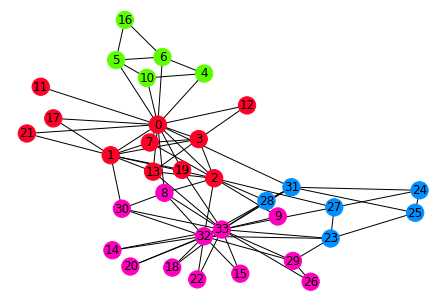

In [ ]:
G = nx.karate_club_graph()

#football=nx.read_gml("football.gml")
#G=nx.Graph(football)
partition = community_louvain.best_partition(G)


# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)

nx.draw(G, with_labels = True,node_color=list(partition.values()),cmap = plt.get_cmap('gist_rainbow'))
plt.show()

Determining the Quality measures:

Strength

In [ ]:
# strength of node delta(u,v)

def delta(u,v):
  return matrix[u][v]


Partition maps the class of each nodes as predicted by Louvain

In [ ]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 3,
 9: 3,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 3,
 15: 3,
 16: 1,
 17: 0,
 18: 3,
 19: 0,
 20: 3,
 21: 0,
 22: 3,
 23: 2,
 24: 2,
 25: 2,
 26: 3,
 27: 2,
 28: 2,
 29: 3,
 30: 3,
 31: 2,
 32: 3,
 33: 3}

In [ ]:
# making the graph matrix from Graph (G)
mat = nx.to_numpy_matrix(G)

In [ ]:
# printing the numpy matrix
mat

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

Cluster formation

In [ ]:
cluster = [[],[],[],[]]
for i in partition:
  cluster[partition[i]].append(i)

In [ ]:
# Clusters and their nodes
var = 1
for i in cluster:
  print("Cluster ",var,"= ",i) 
  var+=1

Cluster  1 =  [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Cluster  2 =  [4, 5, 6, 10, 16]
Cluster  3 =  [23, 24, 25, 27, 28, 31]
Cluster  4 =  [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]


Unifiability

In [ ]:
# Unifiability of cluster C(i) and C(j)

def Unifiability(G,Ci,Cj,mat):

  sum1,sum2,sum3 = 0,0,0

  for i in Ci:
    for j in Cj:
      sum1+=int(mat[[i],[j]])

  for i in Ci:
    for j in G:
      sum2+=int(mat[[i],[j]])
    for j in Cj:
      sum2-=int(mat[[i],[j]])
  
  for i in Cj:
    for j in G:
      sum3+=int(mat[[i],[j]])
    for j in Ci:
      sum3-=int(mat[[i],[j]])

  return sum1/(sum2+sum3-sum1)

In [ ]:
# Unifiability between cluster1 and cluster2

Unifiability(G,cluster[0],cluster[1],mat)

0.07368421052631578

Avg Unifiability

In [ ]:
def AVU(G,cluster,mat):
  
  # calling Unifiability for all clusters

  sum_unifiability = 0

  for i in cluster:
    for j in cluster:
      if i!=j:
        sum_unifiability += Unifiability(G,i,j,mat)

  return sum_unifiability/len(cluster)

In [ ]:
AVU_G = AVU(G=G,cluster=cluster,mat=mat)

In [ ]:
# AVU of graph G
AVU_G

0.1480291638186375

Isolability

In [ ]:
# Isolability of cluster C(i)

def Isolability(G,Ci,mat):

  sum1,sum2 = 0,0

  for i in Ci:
    for j in Ci:
        sum1+=int(mat[[i],[j]])

  for i in Ci:
    for j in G:
      if i!=j:
        sum2+=int(mat[[i],[j]])

  return sum1/(sum1+sum2)

In [ ]:
# Isolability of Cluster1
Isolability(G=G,Ci=cluster[0],mat=mat)

0.43636363636363634

Avg Isolability

In [ ]:
# AVI

def AVI(G,cluster,mat):

  sum = 0
  
  for i in cluster:
    sum += Isolability(G,i,mat)

  return sum/len(cluster)

In [ ]:
AVI_G = AVI(G,cluster,mat)

In [ ]:
# AVI of graph G

AVI_G

0.4147220081150652

Average Unifiability and Isolability


In [ ]:
# AUI 

def AUI(G,cluster,mat):
  avi = AVI(G,cluster,mat)
  avu = AVU(G=G,cluster=cluster,mat=mat)
  return (2*avi)/(1+avu*avi)

In [ ]:
AUI_G = AUI(G,cluster,mat)

In [ ]:
# AUI of graph G

AUI_G

0.7814688966453682

Average Normalized Unifiability & Isolability

In [ ]:
# ANUI

def ANUI(G,cluster,mat):
  return AUI(G,cluster,mat)/2

In [ ]:
ANUI_G = ANUI(G,cluster,mat)

In [ ]:
# ANUI of graph G

ANUI_G

0.3907344483226841

Modularity

In [ ]:
Modularity_G = nx.algorithms.community.quality.modularity(G,communities=cluster)

In [ ]:
# Quality measure using Modularity from networkx library of graph G

Modularity_G

0.41880341880341876

TRUE CLASS LABEL OF GRAPH

In [ ]:
# original mapping of graph G

truelabel = {0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 0,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1}

ACCURACY MEASURES

F MEASURE

In [ ]:
## F-measure
## f-measure  = truepositive/(truepositive + 1/2(falsepositive + falsenegative))

def fmeasure(truelabel,predlabel,G,true,false,ptrue,pfalse):
  
  # truepositive
  tp = 0.0
  for i in G:
    if predlabel[i] == true:
      if truelabel[i] in ptrue:
        tp+=1

  # falsepositive
  fp = 0.0
  for i in G:
    if predlabel[i] == false:
      if truelabel[i] in pfalse:
        fp+=1

  # falsenegative
  fn = 0.0
  for i in G:
    if predlabel[i] == false:
      if not truelabel[i] in ptrue:
        fn+=1
        
  print("tp=",tp," fp=",fp," fn=",fn)
  print("precision = ", tp/(tp+fp))
  print("recall = ", tp/(tp+fn))

  return tp/(tp + 0.5*(fp+fn))

In [ ]:
# Using F1-measure on Louvian Partition

fmeasure(truelabel,partition,G,true=1,false=0,ptrue={1,0},pfalse={2,3})

tp= 11.0  fp= 0.0  fn= 0.0
precision =  1.0
recall =  1.0


1.0

Normalized Mutual Information (NMI) : Accuracy Measure

In [ ]:
## normalized mutual Information 
## NMI = 2*I(Y;C)/[H(Y)+H(C)]

def NMI(G,truelabel,predlabel,cluster):

  ## Entropy of class label
  prob = {}
  for i in G:
    if truelabel[i] in prob:
      prob[truelabel[i]] += 1.0
    else:
      prob[truelabel[i]] = 0.0

  u = []
  for i in prob:
    u.append(prob[i]/len(G)) 

  hy = 0.0
  for i in u:
    hy += (-i)*(math.log(i,2))

  ## Entropy of cluster label
  prob2 = {}
  for i in G:
    if predlabel[i] in prob2:
      prob2[predlabel[i]] += 1.0
    else:
      prob2[predlabel[i]] = 0.0

  v = []
  for i in prob2:
    v.append(prob2[i]/len(G))


  hc = 0.0
  for i in v:
    hc += (-i)*(math.log(i,2))
  
  print("hy\t:Entropy of class label\t\t\t = ",hy)
  print("hc\t:Entropy of cluster label\t\t = ",hc)

  ## Mutual Information

  
  hyc = 0.0
  for j in cluster:

    p = {}
    p.clear()
    for i in G:
      p[predlabel[i]]=0.0

    for i in j:

      if predlabel[i] == truelabel[i]:
        p[predlabel[i]]+= 1.0


    for i in p:
      p[i]=p[i]/len(j)
    
    temp = 0.0
    for i in p:
      if p[i] != 0:
        hyc -= p[i]*(math.log(p[i],2))

  iyc = hy -hyc
  print("hyc\t:Entropy of class label within cluster\t = ",hyc)
  print("iyc\t:Mutual Information\t\t\t = ",iyc)
  return print("\nNMI  = ",(2*iyc)/(hy+hc))

In [ ]:
# value of NMI for Louvian clustering of graph G

NMI(G,truelabel,partition,cluster)

hy	:Entropy of class label			 =  1.023494438823849
hc	:Entropy of cluster label		 =  1.8159181179173376
hyc	:Entropy of class label within cluster	 =  0.2400731786525692
iyc	:Mutual Information			 =  0.7834212601712798

NMI  =  0.5518192545224339


Permanence

In [ ]:
#defining a function that finds the inetersection of nodes 
#from 2 clusters and puts them into a 3rd cluster
def intersection_of_nodes(cluster1, cluster2):
  t=set(cluster2)
  cluster3=[i for i in cluster1 if i in t]
  return cluster3

In [ ]:
# we will find the internal clustering coefficient in this part of the code
def internal_clustering_coefficient(G,cluster,vertex):
  nodes=intersection_of_nodes(cluster,nx.neighbors(G,vertex))
  nodes.append(vertex)

  A=G.subgraph(nodes)
  internalclusteringcoefficient=nx.clustering(A)
  return internalclusteringcoefficient[vertex],len(nodes)-1

In [ ]:
#finding internal clustering coefficinet for all nodes in the cluster
int_clust_coeff={}
I={}
for x in cluster:
  for y in x:
    int_clust_coeff[y],I[y]=internal_clustering_coefficient(G,x,y)

In [ ]:
D = G.degree()#degree of the graph G

In [ ]:
def external_conn_max (G,cluster,vertex):
  max = 0
  for i in cluster:
    x = 0
    for j in i:
      if (mat[[vertex],[j]]):
        x = x+1
    if(x>max):
      max = x
  return max

In [ ]:
E_max = {}
for i in G:
  E_max[i] = external_conn_max(G, cluster, i)

In [ ]:
#permanence 

def permanence(I,E,D,c):

  permanence_value = {}
  for i in I:
    permanence_value[i] = (I[i]/E[i])*(1/D[i]) - (1 - c[i])

  return permanence_value

In [ ]:
print(permanence (I,E_max,D,C_in))

{0: -0.6486111111111111, 1: -0.4603174603174603, 2: -0.30000000000000004, 3: -0.1666666666666667, 7: 0.25, 11: 0.0, 12: 0.5, 13: 0.2, 17: 0.5, 19: 0.3333333333333333, 21: 0.5, 4: -0.6666666666666667, 5: -0.41666666666666674, 6: -0.41666666666666674, 10: -0.6666666666666667, 16: 0.5, 23: -0.8666666666666667, 24: -0.3333333333333334, 25: -0.3333333333333334, 27: -0.75, 28: -0.6666666666666667, 31: -0.5000000000000001, 8: 0.2, 9: -0.5, 14: 0.5, 15: 0.5, 18: 0.5, 20: 0.5, 22: 0.5, 26: 0.5, 29: -0.08333333333333337, 30: 0.25, 32: -0.6666666666666666, 33: -0.7189542483660131}
